In [1]:
# https://youtu.be/NYeJvxe5nYw
"""
This code is derived and adapted from https://github.com/bnsreenu 

This code defines a function to display an image with its corresponding annotations. 
It reads an image and its associated annotation file in the YOLO v8 text format, 
then plots the image along with colored polygons representing the annotated regions. 
The polygons are drawn according to the coordinates provided in the annotation file, 
and colors are assigned based on the category ID.

"""

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tifffile

In [2]:
def display_image_with_annotations(image_path, annotation_path, colors=None):
    # Load image using tifffile
    image = tifffile.imread(image_path)
    img_h, img_w, _ = image.shape

    # Create a figure and axis to display the image
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    ax.axis("off")  # Turn off the axes

    # Define a default color map if none is provided
    if colors is None:
        colors = plt.cm.get_cmap("tab10")

    # Open the annotation file and process each line
    with open(annotation_path, "r") as file:
        for line in file:
            parts = line.strip().split()
            category_id = int(parts[0])
            # Choose color based on category ID, looping through color map if more than 10 categories
            color = colors(category_id % 10)
            # Extract normalized polygon coordinates and denormalize them
            polygon = [float(coord) for coord in parts[1:]]
            polygon = [
                coord * img_w if i % 2 == 0 else coord * img_h
                for i, coord in enumerate(polygon)
            ]
            # Reshape into (num_points, 2) array
            polygon = [(polygon[i], polygon[i + 1]) for i in range(0, len(polygon), 2)]
            # Create a Polygon patch using the denormalized coordinates
            patch = patches.Polygon(polygon, closed=True, edgecolor=color, fill=False)
            # Add the patch to the plot to display the annotated region
            ax.add_patch(patch)

    plt.show()  # Display the image with annotations

C:\Users\alber.DESKTOP-VIFBJNG\AppData\Local\Temp\ipykernel_13840\890039192.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10")


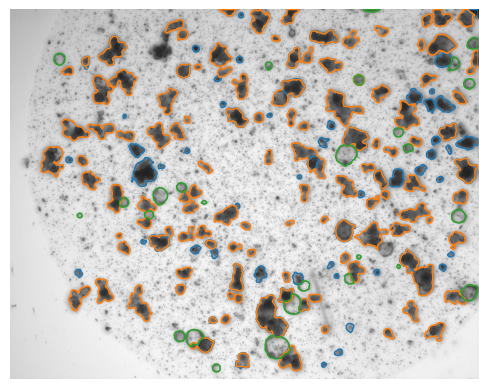

In [4]:
# Example usage with specified image and annotation paths
image_path = "datasets/datasets/yolo_dataset/train/images/MIN_P1A04.tiff"
annotation_path = "datasets/datasets/yolo_dataset/train/labels/MIN_P1A04.txt"
display_image_with_annotations(image_path, annotation_path)